# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
import json
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
sns.set_theme(context='paper', style='ticks', font_scale=1)

In [3]:
name="score_vs_R_k"
width_pt = 469
N=50
palette = sns.color_palette('husl', 6)
type_dict = {
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'avg_group_size' : float,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'N' : int,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*_N_{N}_*.json".format(name=name, N=N))

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        sizes = []
        for group_id in js['groups']:
            sizes.append(int(js['groups'][group_id]))

        avg_group_size = np.mean(sizes)
        
        for seed in js['seeds']:
            seed_js = js.copy()
            seed_js.pop('seeds', None)
            seed_js.pop('groups', None)    
            seed_js = seed_js | js['seeds'][seed]
            seed_js['seed']=seed
            seed_js['avg_group_size'] = avg_group_size

            dicts.append(seed_js)

input_df = pd.DataFrame(dicts)

Reading file 800/800


In [5]:
total_df = input_df.astype(type_dict) # Fix types
# total_df = total_df.rename(columns={"method": "Method", "score": "Score"}) # Rename columns
# total_df = total_df.replace({'binomial': 'Dorfman', 'negbin': 'Algorithm 1'}) # Rename methods

In [6]:
# results = total_df[(total_df['N']==N) & (total_df['lambda_1']==0.0) & (total_df['lambda_2']==0.0) & (total_df['k']<=1.0)]
results = total_df.pivot(index=['lambda_1', 'lambda_2', 'se', 'sp', 'r', 'k', 'seed', 'N'], columns='method', values='score').reset_index()
results['Percentage'] = (results['binomial'] - results['negbin'])/results['binomial']*100
results = results[['r','k','Percentage']]
results = results.groupby(['r', 'k']).mean().reset_index()
results = results.pivot('r', 'k', 'Percentage')

In [7]:
def mapper(r_quer, k_quer, r, k, Z):
    ind_r = 0
    while r[ind_r] < r_quer:
        ind_r += 1
    ind_k = 0
    while k[ind_k] < k_quer:
        ind_k += 1

    return int(np.around(Z[ind_r, ind_k]))


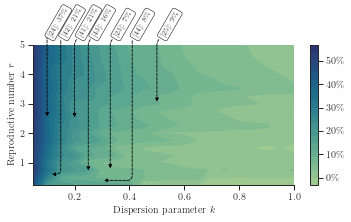

In [10]:
utils.latexify(font_size=10)

Z = results.to_numpy()
k = results.columns.to_numpy()
r = results.index.to_numpy()
X, Y = np.meshgrid(k, r)

nbins=20
levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.8)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect, fig_height))

# ax.contour(X,Y,Z,levels=levels, colors='black', linestyles='solid')
cs = ax.contourf(X,Y,Z,levels=levels, cmap=sns.color_palette("crest", as_cmap=True))
fig.colorbar(cs,format=mpl.ticker.PercentFormatter(),ticks=[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0])
sns.despine(ax=ax)

cit=23
r_quer=0.74
k_quer=0.33
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(k_quer + 0.01, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-150,angleB=90,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
)

cit=24
r_quer=2.5
k_quer=0.1
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(k_quer, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-150,angleB=90,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

cit=25
r_quer=3
k_quer=0.5
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(k_quer + 0.01, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-150,angleB=90,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

cit=41
r_quer=2.47
k_quer=0.2
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(k_quer + 0.01, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-150,angleB=90,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

cit=42
r_quer=0.61
k_quer=0.11
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(0.15, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-90,angleB=0,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

cit=43
r_quer=0.67
k_quer=0.25
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(k_quer + 0.01, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-150,angleB=90,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

cit=44
r_quer=0.4
k_quer=0.3
ax.annotate(r'[{cit}]: {perc}\%'.format(cit=cit, perc=mapper(r_quer=r_quer, k_quer=k_quer, r=r, k=k, Z=Z)), xy=(k_quer, r_quer),  xycoords='data',
            xytext=(0.41, 5.2), textcoords='data',
            size=7,
            arrowprops=dict(color='black', arrowstyle="-|>", connectionstyle="angle, angleA=-90,angleB=0,rad=5", linestyle='--', relpos=(0., 0.)),
            bbox=dict(boxstyle="round", fc="w", ec="black", linewidth=0.5),
            rotation=60,
            horizontalalignment='left', verticalalignment='bottom',
            )

ax.set_yticks([1,2,3,4,5])
ax.set_ylabel(r'Reproductive number $r$')
ax.set_xlabel(r'Dispersion parameter $k$')

fig.tight_layout()
fig.savefig('figures/{name}_N_{N}.pdf'.format(name=name, N=N))